# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np #diperuntukkan dalam proses komputasi numerik
import pandas as pd #diperuntukan dalam proses cleaning hingga analisis data
import seaborn as sns #diperuntukkan dalam proses visualisasi data
import matplotlib.pyplot as plt #diperuntukkan dalam proses visualisasi data
%matplotlib inline

# Import Data



Melakukan import data dari google drive dengan cara menghubungkan google colab dengan akun google drive sehingga google colab dapat mengakses file-file dalam google drive tersebut.

In [2]:
# Menyambungkan akses ke google drive
from google.colab import drive
drive.mount('/content/drive')
# Mengakses dataset berformat csv dari google drive dan diberi nama "df"
# code: pd.read_csv('/content/drive/lokasifile/namafile.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telco_churn.csv')
# Menampilkan dataframe
df

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Missing Value Handling

**1.** **Mengidentifikasi ada/tidak nya Missing Values**

Dilakukan dengan cara menampilkan informasi jumlah Missing Values untuk setiap kolom.

code : namadataframe.isnull().sum()

In [3]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Berdasarkan output yang ditampilkan dapat diketahui bahwa terdapat 11 Missing Value pada data kolom TotalCharges. Maka perlu dilakukan Handling Missing Value pada dataframe df.



---
**2. Mengidentifikasi Data**

Identifikasi ini berguna untuk mengetahui metode handling data yang tepat. Dilakukan dengan cara :
- Menampilkan informasi type data
- Menampilkan statistik deskriptif data
- Menampilkan kurva distribusi data


In [4]:
#Menampilkan informasi type data kolom "TotalCharges"
df['TotalCharges'].dtype

dtype('float64')

Berdasarkan output diketahui bahwa data pada kolom TotalCharges bertipe float.

In [5]:
# Menampilkan statistik deskriptif dari datakolom "TotalCharges"
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Berdasarkan output diketahui bahwa nilai media dengan mean memiliki rentang yang jauh. Hal ini berarti bahwa data kolom TotalCharges tidak berdistribusi normal. Untuk memastikan dapat dilihat dari kurva distribusi data.

<Axes: xlabel='TotalCharges', ylabel='Density'>

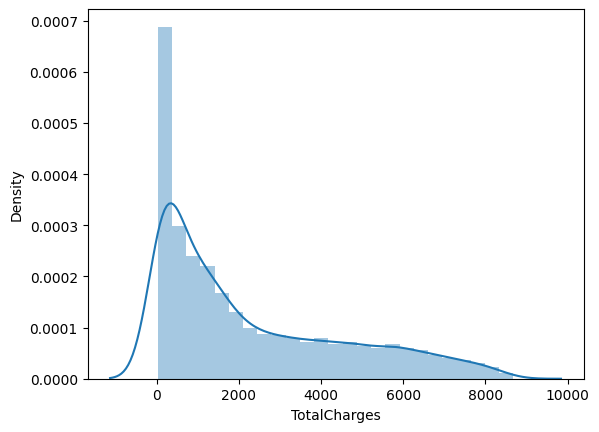

In [6]:
# Menampilkan kurva distribusi dari data kolom "TotalCharges"
sns.distplot(df['TotalCharges'])

Berdasarkan output diketahui bahwa bentuk kurva tidak simetris. Hal ini berarti bahwa data kolom "TotalCharges" tidak berdistribusi normal.

---
**3. Menentukan Metode dan Melakukan Handling Missing Values**

Berdasarkan identifikasi data diketahui:
- Type data adalah float yang berarti merupakan data numerik. Maka metode Handling Missing Value yang dapat digunakan adalah Penghapusan baris yang memiliki nilai data Missing Value atau Pengisian Missing Value dengan nilai-nilai statistik pada data kolom TotalCharges.
- Terdapat 11 nilai data Missing Value pada kolom TotalCharges. Jumlah ini termasuk sedikit dibanding dengan total jumlah data terisi yang diketahui pada output statistik deskriptif yaitu 7032 nilai data. Sehingga metode Penghapusan Baris boleh dilakukan karena tidak terlalu berpengaruh banyak dalam analisis lanjut nantinya.
- Apabila tidak ingin dilakukan Penghapusan Baris karena alasan tertentu seperti tidak ingin menghilangkan informasi, maka metode Pengisian Missing Value dapat dilakukan. Berdasarkan indetifikasi data diketahui bahwa Data tidak berdistribusi normal, maka metode Pengisian yang tepat adalah Pengisian dengan menggunakan nilai Median data kolom TotalCharges.

Pada tugas ini, diputuskan untuk menggunakan metode Pengisian Missing Values dengan Median Data supaya tidak menghilangkan informasi untuk analisis selanjutnya.


In [7]:
# Karena data TotalCharges tidak berdistribusi normal maka dilakukan Missing Value Handling menggunakan metode mengisi data Missing Value dengan nilai median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**4. Menampilkan Hasil Handling Missing Values**

Dilakukan untuk menampilkan informasi jumlah Missing Values pada kolom TotalCharges setelah dilakukan Handling Missing Values.

code : namadataset['namakolom'].isnull().sum()

In [8]:
# Menampilkan jumlah Missing Value pada setiap kolom dari dataset
df['TotalCharges'].isnull().sum()

0

Output saat ini menunjukkan bahwa sudah tidak terdapat Missing Value pada data kolom TotalCharges.

# Categorical Data  Encoding

**1. Mengidentifikasi Data**

Identifikasi dilakukan untuk:
- Mengetahui kolom data mana saja yang perlu dilakukan Encoding, yaitu data yang memiliki type data "object" dan berkategori.
- Menentukan metode Encoding yang tepat dengan mengetahui jumlah kategori dari nilai data. 

Identifikasi dilakukan dengan cara Menampilkan informasi dataset.

code: namadataset.info()




In [9]:
# Menampilkan infromasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Berdasarkan output diketahui terdapat 17 Variabel/Kolom yang bertipe data "object". Namun, kolom customerID bukan termasuk ke dalam tipe data kategori. Hal ini berarti terdapat 16 Variabel/kolom yang perlu dilakukan Categorical Data Encoding yaitu gender, Partner,	Dependents, PhoneService,	MultipleLines,	InternetService,	OnlineSecurity, OnlineBackup, DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod, dan Churn.

In [10]:
# Menampilkan dataframe
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Berdasarkan output dataframe secara keseluruhan terlihat untuk kolom yang bernilai data kategori, terdapat kolom yang memiliki jumlah kategori 2, 3, hingga 4.

---
**2. Menentukan Metode dan Melakukan Categorical Data Encoding**

Beberapa metode umum dalam melakukan Encoding adalah Label Encoding, One Hot Encoding, dan Frequency Encoding. 
- Berdasarkan identifikasi data diketahui bahwa terdapat beberapa kolom yang memiliki nilai data lebih dari 2 kategori sehingga metode yang lebih baik digunakan yaitu One Hot Encoding atau Frequency Encoding. Hal ini karena metode Label Encoding kurang dapat merepresentasikan data awal apabila terdapat lebih dari 2 label pada satu variabel data. Meskipun dapat dilakukan terpisah di mana kolom yang memiliki 2 kategori dilakukan Label Encoding dan kolom yang memiliki lebih dari 2 kategori menggunakan metode yang lain, hal itu kurang efisien karena harus melakukan proses encoding 2 kali dan sebelumnya pun perlu dilakukan pengecekan jumlah kategori untuk setiap kolom supaya dapat menemukan kolom dengan 2 kategori nilai data.
- Berdasarkan identifikasi diketahui pula terdapat 16 kolom data yang memerlukan proses Encoding. Apabila dilakukan Encoding dengan Metode One Hot maka jika 1 kolom data minimal terdapat 2 kategori setidaknya akan terbentuk 32 kolom tambahan sebagai output dari Encoding dan hal tersebut kurang baik karena selain terlalu banyak kolom akan banyak dihasilkan pula sparse data. Oleh karena itu, untuk meminimalisir hal tersebut metode Frequency Encoding menjadi metode yang lebih tepat.




In [12]:
# Frequency Encoding
freq_et = df['gender'].value_counts().reset_index()
freq_et.rename(columns={"index": "gender", "gender": "freq_gender"}, inplace = True)
freq_et['pct_gender'] = round((freq_et['freq_gender']/freq_et['freq_gender'].sum())*100,2)
df = df.merge(freq_et[['gender','pct_gender']], on='gender', how='inner')

freq_et = df['Partner'].value_counts().reset_index()
freq_et.rename(columns={"index": "Partner", "Partner": "freq_Partner"}, inplace = True)
freq_et['pct_Partner'] = round((freq_et['freq_Partner']/freq_et['freq_Partner'].sum())*100,2)
df = df.merge(freq_et[['Partner','pct_Partner']], on='Partner', how='inner')

freq_et = df['Dependents'].value_counts().reset_index()
freq_et.rename(columns={"index": "Dependents", "Dependents": "freq_Dependents"}, inplace = True)
freq_et['pct_Dependents'] = round((freq_et['freq_Dependents']/freq_et['freq_Dependents'].sum())*100,2)
df = df.merge(freq_et[['Dependents','pct_Dependents']], on='Dependents', how='inner')

freq_et = df['PhoneService'].value_counts().reset_index()
freq_et.rename(columns={"index": "PhoneService", "PhoneService": "freq_PhoneService"}, inplace = True)
freq_et['pct_PhoneService'] = round((freq_et['freq_PhoneService']/freq_et['freq_PhoneService'].sum())*100,2)
df = df.merge(freq_et[['PhoneService','pct_PhoneService']], on='PhoneService', how='inner')

freq_et = df['MultipleLines'].value_counts().reset_index()
freq_et.rename(columns={"index": "MultipleLines", "MultipleLines": "freq_MultipleLines"}, inplace = True)
freq_et['pct_MultipleLines'] = round((freq_et['freq_MultipleLines']/freq_et['freq_MultipleLines'].sum())*100,2)
df = df.merge(freq_et[['MultipleLines','pct_MultipleLines']], on='MultipleLines', how='inner')

freq_et = df['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et['pct_InternetService'] = round((freq_et['freq_InternetService']/freq_et['freq_InternetService'].sum())*100,2)
df = df.merge(freq_et[['InternetService','pct_InternetService']], on='InternetService', how='inner')

freq_et = df['OnlineSecurity'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_et['pct_OnlineSecurity'] = round((freq_et['freq_OnlineSecurity']/freq_et['freq_OnlineSecurity'].sum())*100,2)
df = df.merge(freq_et[['OnlineSecurity','pct_OnlineSecurity']], on='OnlineSecurity', how='inner')

freq_et = df['OnlineBackup'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineBackup", "OnlineBackup": "freq_OnlineBackup"}, inplace = True)
freq_et['pct_OnlineBackup'] = round((freq_et['freq_OnlineBackup']/freq_et['freq_OnlineBackup'].sum())*100,2)
df = df.merge(freq_et[['OnlineBackup','pct_OnlineBackup']], on='OnlineBackup', how='inner')

freq_et = df['DeviceProtection'].value_counts().reset_index()
freq_et.rename(columns={"index": "DeviceProtection", "DeviceProtection": "freq_DeviceProtection"}, inplace = True)
freq_et['pct_DeviceProtection'] = round((freq_et['freq_DeviceProtection']/freq_et['freq_DeviceProtection'].sum())*100,2)
df = df.merge(freq_et[['DeviceProtection','pct_DeviceProtection']], on='DeviceProtection', how='inner')

freq_et = df['TechSupport'].value_counts().reset_index()
freq_et.rename(columns={"index": "TechSupport", "TechSupport": "freq_TechSupport"}, inplace = True)
freq_et['pct_TechSupport'] = round((freq_et['freq_TechSupport']/freq_et['freq_TechSupport'].sum())*100,2)
df = df.merge(freq_et[['TechSupport','pct_TechSupport']], on='TechSupport', how='inner')

freq_et = df['StreamingTV'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingTV", "StreamingTV": "freq_StreamingTV"}, inplace = True)
freq_et['pct_StreamingTV'] = round((freq_et['freq_StreamingTV']/freq_et['freq_StreamingTV'].sum())*100,2)
df = df.merge(freq_et[['StreamingTV','pct_StreamingTV']], on='StreamingTV', how='inner')

freq_et = df['StreamingMovies'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingMovies", "StreamingMovies": "freq_StreamingMovies"}, inplace = True)
freq_et['pct_StreamingMovies'] = round((freq_et['freq_StreamingMovies']/freq_et['freq_StreamingMovies'].sum())*100,2)
df = df.merge(freq_et[['StreamingMovies','pct_StreamingMovies']], on='StreamingMovies', how='inner')

freq_et = df['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et['pct_Contract'] = round((freq_et['freq_Contract']/freq_et['freq_Contract'].sum())*100,2)
df = df.merge(freq_et[['Contract','pct_Contract']], on='Contract', how='inner')

freq_et = df['PaperlessBilling'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaperlessBilling", "PaperlessBilling": "freq_PaperlessBilling"}, inplace = True)
freq_et['pct_PaperlessBilling'] = round((freq_et['freq_PaperlessBilling']/freq_et['freq_PaperlessBilling'].sum())*100,2)
df = df.merge(freq_et[['PaperlessBilling','pct_PaperlessBilling']], on='PaperlessBilling', how='inner')

freq_et = df['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['pct_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
df = df.merge(freq_et[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')

freq_et = df['Churn'].value_counts().reset_index()
freq_et.rename(columns={"index": "Churn", "Churn": "freq_Churn"}, inplace = True)
freq_et['pct_Churn'] = round((freq_et['freq_Churn']/freq_et['freq_Churn'].sum())*100,2)
df = df.merge(freq_et[['Churn','pct_Churn']], on='Churn', how='inner')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,pct_OnlineSecurity_y,pct_OnlineBackup_y,pct_DeviceProtection_y,pct_TechSupport_y,pct_StreamingTV_y,pct_StreamingMovies_y,pct_Contract_y,pct_PaperlessBilling_y,pct_PaymentMethod_y,pct_Churn_y
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.90,39.54,55.02,59.22,33.58,73.46
1,1078-TDCRN,Female,1,Yes,No,3,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.90,39.54,55.02,59.22,33.58,73.46
2,6339-DKLMK,Female,0,No,No,13,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.90,39.54,55.02,59.22,33.58,73.46
3,6637-KYRCV,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.90,39.54,55.02,59.22,33.58,73.46
4,6625-UTXEW,Female,0,Yes,No,12,Yes,No,DSL,No,...,49.67,34.49,43.94,49.31,39.90,39.54,55.02,59.22,33.58,73.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2225-ZRGSG,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,28.67,34.49,34.39,29.02,39.90,39.54,24.07,40.78,21.92,26.54
7039,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,49.67,34.49,43.94,49.31,38.44,38.79,24.07,40.78,21.92,26.54
7040,1725-IQNIY,Male,0,Yes,No,54,Yes,No,Fiber optic,Yes,...,28.67,34.49,34.39,29.02,38.44,38.79,24.07,40.78,21.92,26.54
7041,6990-YNRIO,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,...,28.67,43.84,34.39,29.02,38.44,38.79,24.07,40.78,21.92,26.54


Berdasarkan output yang ditampilkan telah terbentk kolom baru yang menampilkan data categorical numerik pada kolom yang dilakukan Encoding.

# Anomalies and Outlier Handling

**1. Mengidentifikasi Data**

Anomalies and Outlier Handling diperuntukkan untuk data bertipe integer atau float dengan minimal ukuran data berupa interval. Berdasarkan informasi-informasi data yang sudah diketahui sebelumnya diketahui bahwa terdapat 2 data bertipe integer yaitu SeniorCitizen dan tenure serta terdapat 2 data bertipe float yaitu MonthlyCharges dan TotalCharges. Namun data SeniorCitizen merupakan data kategori, sehingga hanya data tenure,MonthlyCharges, dan TotalCharges yang dilakukan pengecekan outlier.

Identifikasi outlier dapat dilakukan dengan menampilkan boxplot.

Text(0.5, 0, '')

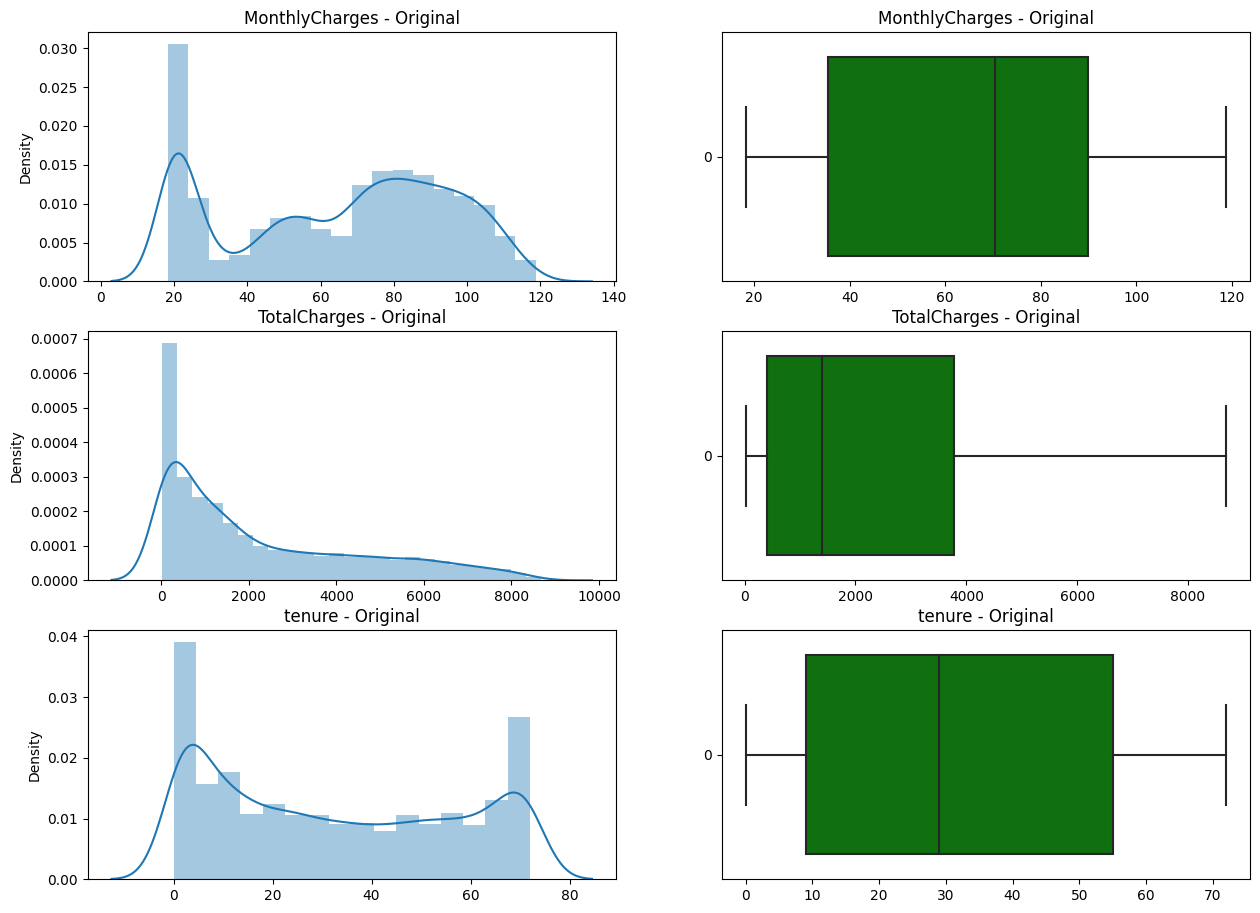

In [13]:
# Menampilkan kurva dan boxplot dari data ketiga kolom untuk mengetahui adanya outlier
f,ax = plt.subplots(3,2,figsize=(15,11))

g = sns.distplot(df['MonthlyCharges'],kde=True, ax=ax[0,0])
ax[0,0].set_title('MonthlyCharges - Original')
ax[0,0].set_xlabel('')
g = sns.boxplot(df['MonthlyCharges'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('MonthlyCharges - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(df['TotalCharges'],kde=True, ax=ax[1,0])
ax[1,0].set_title('TotalCharges - Original')
ax[1,0].set_xlabel('')
g = sns.boxplot(df['TotalCharges'],color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('TotalCharges - Original')
ax[1,1].set_xlabel('')

g = sns.distplot(df['tenure'],kde=True, ax=ax[2,0])
ax[2,0].set_title('tenure - Original')
ax[2,0].set_xlabel('')
g = sns.boxplot(df['tenure'],color='green',orient='h', ax=ax[2,1])
ax[2,1].set_title('tenure - Original')
ax[2,1].set_xlabel('')
# Berdasarkan output yang diperoleh tidak ditemukan adanya outlier pada ketiga kolom/variabel

Berdasarkan output boxplot dari ketiga kolom diketahui tidak terdapat nilai yang kurang dari batas minimum atau lebih dari batas maksimum. Sehingga, dapat dikatakan bahwa tidak terdapat adanya outlier pada data.
Untuk memastikan, apabila dilakukan Anomalies dan Outlier Handling maka jumlah baris data akan tetap sama/ tidak berkurang.

---
**2. Melakukan Anomalies dan Outlier Handling**

Terdapat 3 metode umum yang dapat digunakan yaitu Metode Log Transformation, Metode Z-Score, dan Metode IQR. Metode Log Transformation dan IQR lebih maksimal dalam menghilangkan outlier dari metode Z-Score.
Pada tugas ini supaya diketahui jumlah baris yang berkurang setelah dilakukan Anomalies dan Outlier Handling, dan memaksimalkan penghapusan outlier digunakan Metode IQR.


In [18]:
# IQR Outlier Handling "tenure"
print('Jumlah baris sebelum handling outlier pada kolom tenure:', len(df))
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['tenure'] >= low_limit) & (df['tenure'] <= high_limit))
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(df))

Jumlah baris sebelum handling outlier pada kolom tenure: 7043
Jumlah baris setelah memfilter outlier: 7043


In [15]:
# IQR Outlier Handling "MonthlyCharges"
print('Jumlah baris sebelum handling outlier pada kolom MonthlyCharges:', len(df))
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['MonthlyCharges'] >= low_limit) & (df['MonthlyCharges'] <= high_limit))
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(df))

Jumlah baris sebelum handling outlier pada kolom MonthlyCharges: 7043
Jumlah baris setelah memfilter outlier: 7043


In [16]:
# IQR Outlier Handling "TotalCharges"
print('Jumlah baris sebelum handling outlier pada kolom TotalCharges:', len(df))
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['TotalCharges'] >= low_limit) & (df['TotalCharges'] <= high_limit))
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(df))
df.head()

Jumlah baris sebelum handling outlier pada kolom TotalCharges: 7043
Jumlah baris setelah memfilter outlier: 7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,pct_OnlineSecurity_y,pct_OnlineBackup_y,pct_DeviceProtection_y,pct_TechSupport_y,pct_StreamingTV_y,pct_StreamingMovies_y,pct_Contract_y,pct_PaperlessBilling_y,pct_PaymentMethod_y,pct_Churn_y
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.9,39.54,55.02,59.22,33.58,73.46
1,1078-TDCRN,Female,1,Yes,No,3,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.9,39.54,55.02,59.22,33.58,73.46
2,6339-DKLMK,Female,0,No,No,13,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.9,39.54,55.02,59.22,33.58,73.46
3,6637-KYRCV,Female,0,Yes,Yes,5,No,No phone service,DSL,No,...,49.67,34.49,43.94,49.31,39.9,39.54,55.02,59.22,33.58,73.46
4,6625-UTXEW,Female,0,Yes,No,12,Yes,No,DSL,No,...,49.67,34.49,43.94,49.31,39.9,39.54,55.02,59.22,33.58,73.46


Berdasarkan output hasil Anomalies dan Outlier Handling dari ketiga data diketahui bahwa jumlah baris sebelum dan sesudah dilakukan Handling tetap sama. Hal tersebut membuktikan bahwa tidak terdapat outlier pada dataset ini.